<a href="https://colab.research.google.com/github/opjns/Wildfire-prediction/blob/main/Wildfire_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Climate Conditions

##Data

In [ ]:
import kagglehub
import pandas as pd
import os

# Download both datasets
path1 = kagglehub.dataset_download("ayoubjadouli/morocco-wildfire-predictions-2010-2022-ml-dataset")
path2 = kagglehub.dataset_download("amin05/wildfire-analysis-and-prediction")

def load_all_data(path, n_rows=10000):
    dataframes = []
    for file in os.listdir(path):
        full_path = os.path.join(path, file)
        if file.endswith(".parquet"):
            df = pd.read_parquet(full_path)
            dataframes.append(df)
        elif file.endswith(".csv"):
            df = pd.read_csv(full_path)
            dataframes.append(df)
    return dataframes


dfs1 = load_all_data(path1, n_rows=10000)
dfs2 = load_all_data(path2, n_rows=10000)

# Combine
combined_df = pd.concat(dfs1 + dfs2, ignore_index=True)

df = combined_df.copy()

df_filtered = combined_df[['latitude','longitude','NDVI','average_temperature_lag_1', 'precipitation_lag_1','dew_point_lag_1','wind_speed_lag_1','is_fire']].rename(columns={
    'average_temperature_lag_1': 'Temperature',
    'precipitation_lag_1': 'Precipitation',
    'dew_point_lag_1': 'humidity',
    'wind_speed_lag_1': 'windspeed'})

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7c16aec4d080>
Traceback (most recent call last):
  File "/usr/lib/python3.11/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):

KeyboardInterrupt: 


100%|██████████| 199M/199M [00:08<00:00, 25.3MB/s]

Extracting files...


100%|██████████| 269M/269M [00:10<00:00, 27.6MB/s]

Extracting files...


In [ ]:
print(df_filtered.columns)

Index(['latitude', 'longitude', 'NDVI', 'Temperature', 'Precipitation',
       'humidity', 'windspeed', 'is_fire'],
      dtype='object')


##Train Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


df_filtered = df_filtered.dropna()


X = df_filtered.drop(columns=['is_fire'])
y = df_filtered['is_fire']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9992884580404241
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93556
         1.0       1.00      1.00      1.00     93362

    accuracy                           1.00    186918
   macro avg       1.00      1.00      1.00    186918
weighted avg       1.00      1.00      1.00    186918



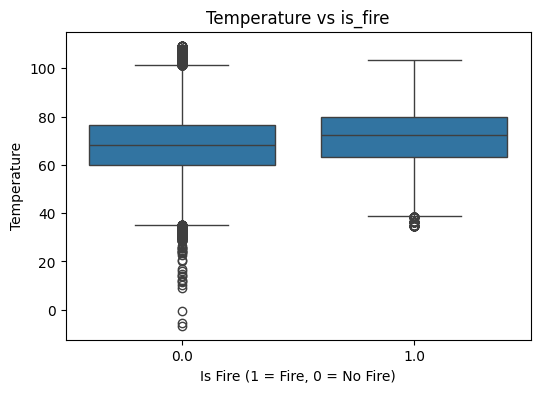

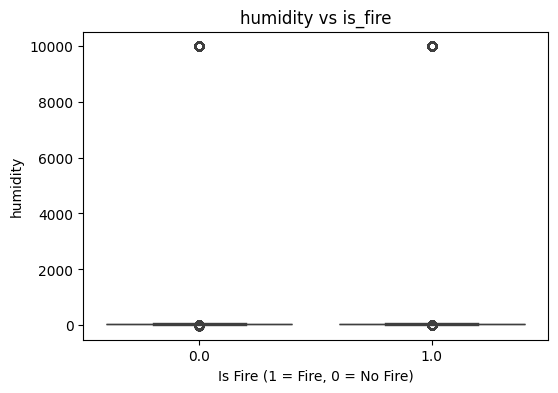

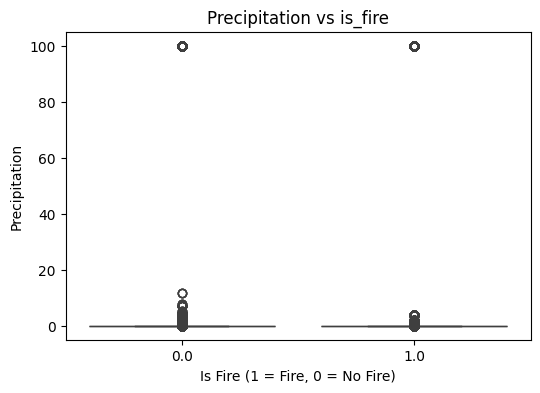

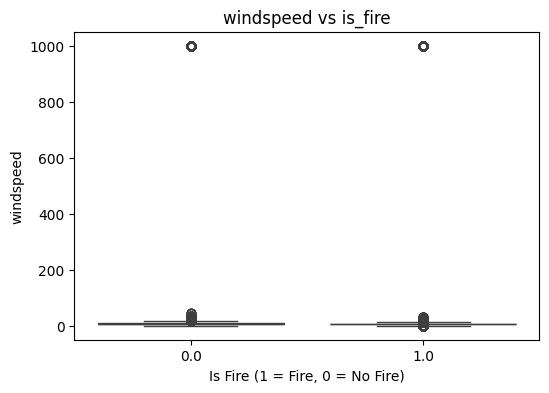

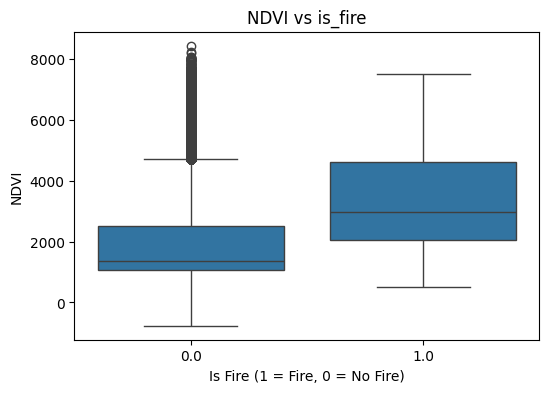

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sensor_columns = ['Temperature', 'humidity', 'Precipitation', 'windspeed', 'NDVI']

column_mapping = {
    'Temperature': 'average_temperature_lag_1',
    'humidity': 'dew_point_lag_1',
    'Precipitation': 'precipitation_lag_1',
    'windspeed': 'wind_speed_lag_1',
    'NDVI': 'NDVI'
}

for col in sensor_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='is_fire', y=column_mapping[col])
    plt.title(f'{col} vs is_fire')
    plt.xlabel('Is Fire (1 = Fire, 0 = No Fire)')
    plt.ylabel(col)
    plt.show()

In [ ]:
df_filtered.head(10)

,latitude,longitude,NDVI,Temperature,Precipitation,humidity,windspeed,is_fire
0,31.390602,-4.254445,1139.0,73.500000,0.0,41.599998,6.200000,1.0
1,33.832943,-5.188356,3223.0,45.200001,0.0,34.299999,5.400000,1.0
2,35.385689,-5.684218,4987.0,64.500000,0.0,54.099998,21.299999,1.0
3,30.122351,-7.498038,991.0,76.199997,0.0,23.799999,3.500000,0.0
4,30.221554,-9.154314,2171.0,78.599998,0.0,46.299999,8.100000,1.0
5,34.498917,-2.332624,1604.0,63.799999,0.0,54.000000,4.700000,0.0
6,35.522633,-5.526712,5696.0,85.000000,0.0,52.099998,12.200000,1.0
7,32.087673,-8.773463,1674.0,70.300003,0.0,58.500000,6.600000,0.0
8,32.540138,-6.300411,2536.0,74.199997,0.0,58.099998,5.000000,1.0
9,32.931473,-3.967042,1240.0,56.500000,0.0,30.700001,12.600000,0.0


In [ ]:
print("Total rows:", len(df_filtered))
print("Total columns:", len(df_filtered.columns))

Total rows: 4725155
Total columns: 8


In [ ]:
print(df['is_fire'].value_counts())

is_fire
1.0    467293
0.0    467293
Name: count, dtype: int64


Accuracy: 0.9992884580404241
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93556
         1.0       1.00      1.00      1.00     93362

    accuracy                           1.00    186918
   macro avg       1.00      1.00      1.00    186918
weighted avg       1.00      1.00      1.00    186918



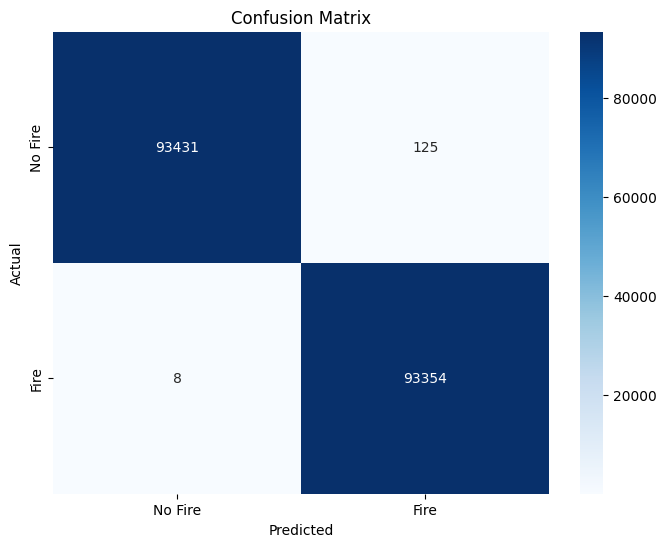

In [ ]:


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'wildfire_model.pkl')

['wildfire_model.pkl']

In [ ]:
!pip install streamlit
import streamlit as st
import joblib
import numpy as np

model = joblib.load('wildfire_model.pkl')
!pip install streamlit
import streamlit as st
import joblib
import numpy as np

model = joblib.load('wildfire_model.pkl')

st.title("Wildfire Risk Prediction")
# Input fields for the user
temperature = st.number_input("Temperature (°C)")
precipitation = st.number_input("Precipitation (mm)")
humidity = st.number_input("Humidity (%)")
windspeed = st.number_input("Windspeed (m/s)")
ndvi = st.number_input("NDVI")
latitude = st.number_input("Latitude")
longitude = st.number_input("Longitude")

# Predict button
if st.button("Predict Wildfire Risk"):
    features = np.array([[temperature, precipitation, humidity, windspeed, ndvi, latitude, longitude]])
    prediction = model.predict(features)
    risk = "🔥 Fire Risk" if prediction[0] == 1 else "✅ No Fire Risk"
    st.success(f"Prediction: {risk}")
precipitation = st.number_input("Precipitation (mm)")
humidity = st.number_input("Humidity (%)")
windspeed = st.number_input("Windspeed (m/s)")
ndvi = st.number_input("NDVI")
latitude = st.number_input("Latitude")
longitude = st.number_input("Longitude")

# Predict button
if st.button("Predict Wildfire Risk"):
    features = np.array([[temperature, precipitation, humidity, windspeed, ndvi, latitude, longitude]])
    prediction = model.predict(features)
    risk = "🔥 Fire Risk" if prediction[0] == 1 else "✅ No Fire Risk"
    st.success(f"Prediction: {risk}")

2025-05-21 06:35:23.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 06:35:23.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 06:35:23.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 06:35:23.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 06:35:23.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 06:35:23.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 06:35:23.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 06:35:23.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar